#### **Exercise 1:**
Create a function returning the first N terms of the tailor series of the function without using the sympy series function.

In [16]:
import sympy as sp

def taylor_series (func, x, n, a):
    """
    Compute the first n terms of Taylor expansion of function func,
    which is in variable of x, at a
    """
    series = 0

    # Generate first term
    series += func.subs(x, a)

    # Generate next terms
    for i in range (1, n):
        func = sp.diff(func, x)
        new_term = func.subs(x, a) * (x - a)**i / sp.factorial(i)
        series += new_term
    return series

In [46]:
# Define variable
x = sp.symbols('x')

# Write function example in sympy symbols
func = x**5 * sp.sin(x)

# Number of terms and location of expansion
n, a = 3, 1

In [49]:
# Call the taylor series function
taylor_series(func, x, n, 1).expand()

5*x**2*cos(1) + 19*x**2*sin(1)/2 - 14*x*sin(1) - 9*x*cos(1) + 4*cos(1) + 11*sin(1)/2

In [50]:
# Call the taylor series function (with Sympy)
func.series(x, x0=a, n=n).expand()

11*sin(1)/2 + 4*cos(1) - 9*x*cos(1) - 14*x*sin(1) + 19*x**2*sin(1)/2 + 5*x**2*cos(1) + O((x - 1)**3, (x, 1))

#### **Exercise 2:**

Write a matrix multiplication function using lists ("manually", using the matrix multiplication formula) and another one using numpy arrays (call matmul function). Time them both. 

In [28]:
import numpy as np

In [98]:
def multiply_list (mat1, mat2):
    if len(mat1[0]) == len(mat2):
        # Determine matrix size of the multiplication result
        nrow, ncol = len(mat1), len(mat2[0])
        
        # Determine the size of the intersection
        nmid = len(mat1[0])

        # Initialize an output matrix with given size
        out = [[0 for _ in range (ncol)] for _ in range(nrow)]

        # Iterate over each entry in the output matrix
        for i in range (nrow):
            for j in range (ncol):
                # Compute sum of element-wise multiplication
                out[i][j] = sum([(mat1[i][k] * mat2[k][j]) for k in range (nmid)])
        return out
    else:
        print('dimensions are wrong!')
        return

In [99]:
# Matrices example
n = 300
mat1 = [[np.random.uniform() for _ in range (n)] for _ in range (n)] # n x n matrix
mat2 = [[np.random.uniform() for _ in range (n)] for _ in range (n)] # n x n matrix

In [100]:
%timeit multiply_list(mat1, mat2)

1.2 s ± 94.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [62]:
%timeit np.matmul(np.array(mat1), np.array(mat2))

24.5 ms ± 663 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### **Execrise 3:**

Consider the following example. Change functions in it to plot something different from `sin` in each panel. Add x and y labels to each panel. Experiment till this looks nice enough for an article. Save the output. 

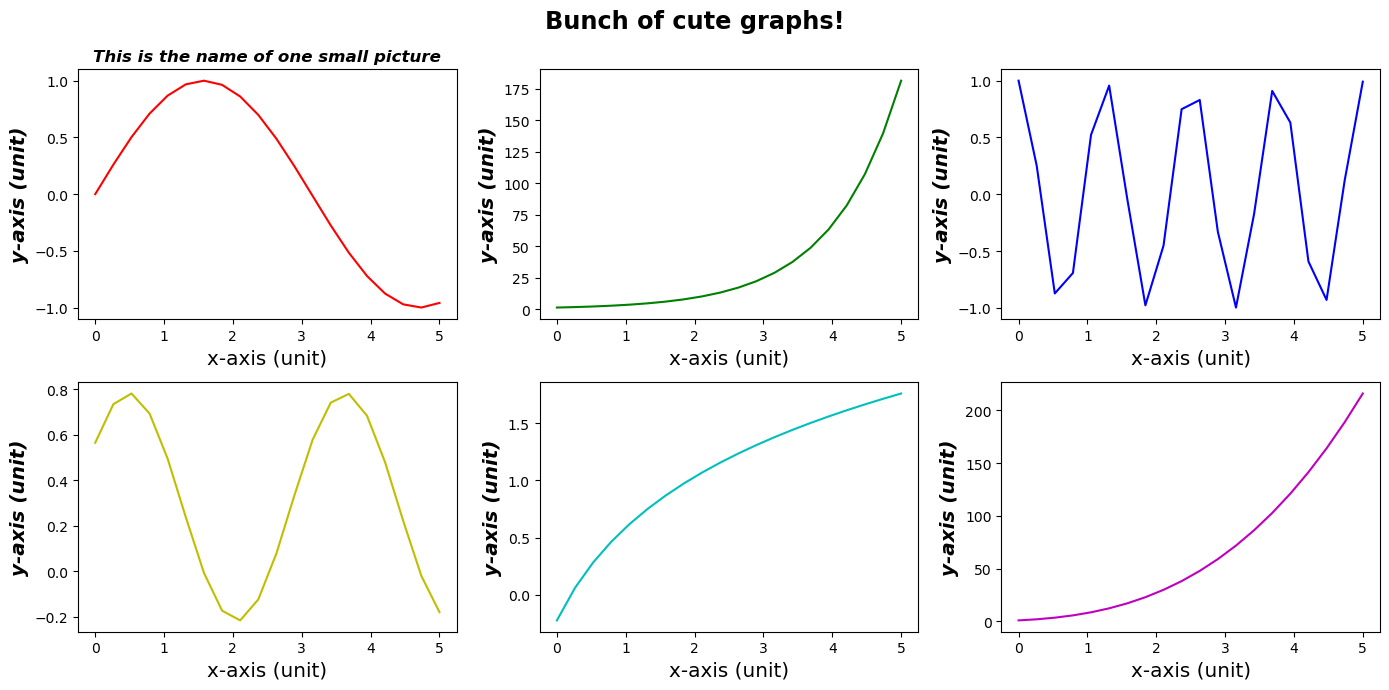

In [61]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0,5,20)
y1 = np.sin(x)
y2 = np.exp(x + 0.2)
y3 = np.cos(5*x)
y4 = np.sin(x + 0.6) * np.cos(x)
y5 = np.log(x + 0.8)
y6 = (x + 1) **3

# now we decide the actual figure size in inches
fig = plt.figure(figsize=(14,7))

plt.suptitle('Bunch of cute graphs!',fontweight='bold', fontsize='xx-large')
plt.subplots_adjust(hspace=0.3, top=0.8) 
# create subplots 231 means make a 2x3 grid and this is the first plot
plt.subplot(231)
#these are here to show that you can do the same here as for a single plot
plt.title('This is the name of one small picture',fontsize = 'large',fontstyle='italic',fontweight='bold')
plt.ylabel('y-axis (unit)',fontsize = 'x-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('x-axis (unit)',fontsize = 'x-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y1,color='r')

plt.subplot(232)
plt.ylabel('y-axis (unit)',fontsize = 'x-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('x-axis (unit)',fontsize = 'x-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y2,color='g')

plt.subplot(233)
plt.ylabel('y-axis (unit)',fontsize = 'x-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('x-axis (unit)',fontsize = 'x-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y3,color='b')

plt.subplot(234)
plt.ylabel('y-axis (unit)',fontsize = 'x-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('x-axis (unit)',fontsize = 'x-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y4,color='y')

plt.subplot(235)
plt.ylabel('y-axis (unit)',fontsize = 'x-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('x-axis (unit)',fontsize = 'x-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y5,color='c')

plt.subplot(236)
plt.ylabel('y-axis (unit)',fontsize = 'x-large',fontstyle='oblique',fontweight = 'heavy')
plt.xlabel('x-axis (unit)',fontsize = 'x-large',fontstyle='normal',fontweight = 'medium')
plt.plot(x,y6,color='m')
# removed extra white space
plt.tight_layout()
#plt.show()

#### **Exercise 4:**
Plot the recaman sequence in the following way:

Add a semi-circular arc from $a_{n}$ to $a_{n-1}$.

Alternate the arcs to be above and below the x-axis according to whether
    n is even or odd.

In [63]:
def recaman(max_terms):
    exist = set()
    seq=list()
    n = 0 
    a = 0
    while n < max_terms:
        diff=a-n
        if diff > 0 and diff not in exist:
            a = diff
        else:
            a = a + n
        exist.add(a)
        seq.append(a)
        n += 1
    return seq

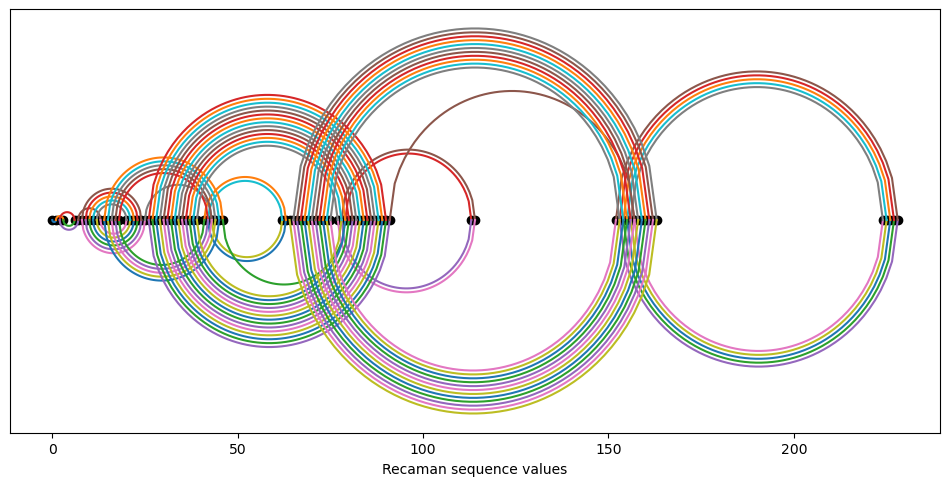

In [166]:
# Define number of sequence
n = 100

# Define the sequence
xlist = recaman(n)

# Define figure with custom size
plt.figure(figsize=(12, 5.5))

# Plot sequence points in a single line
plt.plot(xlist, [0 for _ in range (n)], 'ok')

# Create semi-circular arcs which connect pairs
for i in range (n-1):
    # Take sequence between the pair
    x1, x2 = xlist[i], xlist[i+1]

    # Compute arc radius
    r = abs(x2 - x1) / 2

    # Create x-axis values between the the pair
    xarc = np.linspace(x1, x2, 50)

    # Create y-axis values which is the arc
    if (i % 2): # even number, arc is above
        yarc = np.sqrt(r**2 - (xarc - 0.5 * (x1 + x2))**2)
    else:
        yarc = -np.sqrt(r**2 - (xarc - 0.5 * (x1 + x2))**2)

    # Plot the arc
    plt.plot(xarc, yarc)

    # Edit labels
    plt.xlabel('Recaman sequence values')
    plt.yticks([])

#### **Exercise 5:**

Plot a rainbow. Use your imagination and google to make it beautiful.

In [101]:
import matplotlib as mpl

/tmp/ipykernel_10368/3879883647.py:31: RuntimeWarning: invalid value encountered in sqrt
  ylist_down = np.sqrt(radlist[-i-1]**2 - (xlist - radius)**2)
/tmp/ipykernel_10368/3879883647.py:28: RuntimeWarning: invalid value encountered in sqrt
  ylist_up = np.sqrt(radlist[-i]**2 - (xlist - radius)**2)


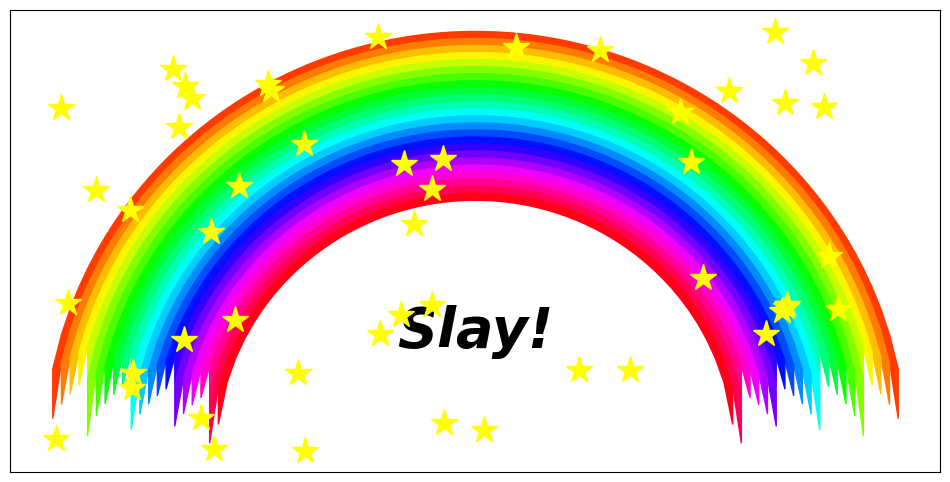

In [143]:
# Parameters

cmap = 'hsv'    # choose colormap
radius = 10     # maximum radius of the rainbow arc
thickness = 4   # thickness of the rainbow arc (should be less than radius)
ncol = 25       # number of color shades

# Take colors at regular intervals spanning the colormap
cmap = mpl.colormaps[cmap]
colors = cmap(np.linspace(0, 1, ncol))

# Compute radius of each color arcs
radlist = np.linspace(radius - thickness, radius, ncol)

# Create radius of the rainbow
xlist = np.linspace(0, radius * 2, 100)

# Create location for stars
star_xlist = np.random.uniform(0, radius * 2, 50)
star_ylist = np.random.uniform(0, radius, 50)

# Initialize figure
plt.figure(figsize=(12, 6))

# Plot for each color
for i in range (1, ncol):
    # Create upper arc values in y-axis
    ylist_up = np.sqrt(radlist[-i]**2 - (xlist - radius)**2)

    # Create lower arc values in y-axis
    ylist_down = np.sqrt(radlist[-i-1]**2 - (xlist - radius)**2)

    # Call matplotlib function to shade area between arcs
    plt.fill_between(xlist, ylist_down, ylist_up, color=colors[i])

# Remove ticks
plt.xticks([])
plt.yticks([])

# Create title
plt.text(radius, radius/4, 'Slay!',
         horizontalalignment='center',
         fontsize = 40,fontstyle='italic',fontweight='bold',zorder=-1)

# Add stars
plt.plot(star_xlist, star_ylist, "*", markersize=20, color="yellow")

plt.show()

#### **Exercise 6:**

Plot a nice-looking 3-D torus. Do this 3 times with different styles. 

##### Lines

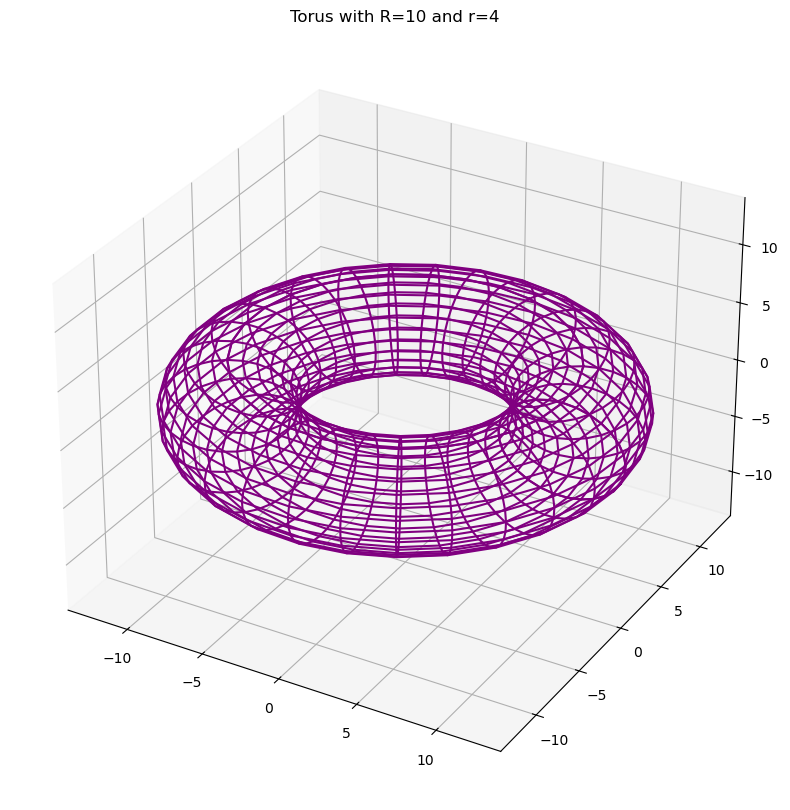

In [ ]:
from mpl_toolkits import mplot3d

# Create plot
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Define R and r
R, r = 10, 4

# Define phi and theta
n = 30                     # number of discretization of n
phi_list = np.linspace(0, 2*np.pi, n, endpoint=True)
theta_list = np.linspace(0, 2*np.pi, n, endpoint=True)

# Plot in latitude 
for phi in phi_list:
    # Compute x, y, z over phi and theta
    x = (R + r * np.sin(theta_list)) * np.cos(phi)
    y = (R + r * np.sin(theta_list)) * np.sin(phi)
    z = r * np.cos(theta_list)

    # Plot the path
    ax.plot3D(x,y,z, color='purple')

# Plot in longitude
for theta in theta_list:
    # Compute x, y, z over phi and theta
    x = (R + r * np.sin(theta)) * np.cos(phi_list)
    y = (R + r * np.sin(theta)) * np.sin(phi_list)
    z = r * np.cos(theta)

    # Plot the path
    ax.plot3D(x,y,z, color='purple')

# Add title
plt.title(f'Torus with R={R} and r={r}')

# Set limits
ax.set_xlim(-r-R,r+R) # This one is just to explicit what is already implicit: those are already the default range, since default is to use actual data min and max
ax.set_ylim(-r-R,r+R) # Same remark
ax.set_zlim(-r-R,r+R) # But this one changes things: implicit range would have been [-r,r] without this line

plt.show()

##### Scatters

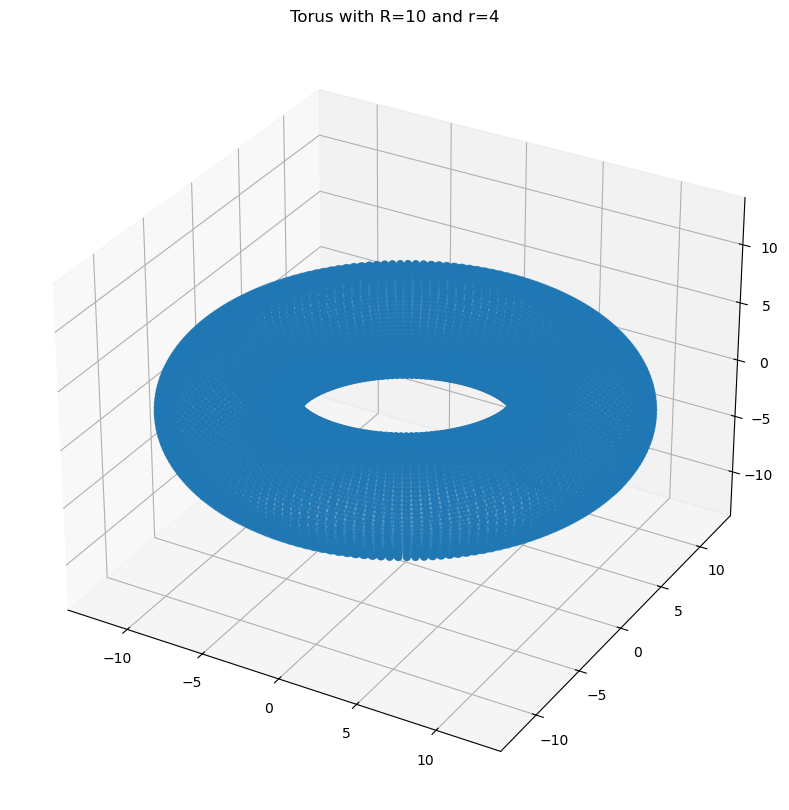

In [235]:
# Define phi and theta
n = 85
theta = np.linspace(0, 2*np.pi, n, endpoint=True)
phi = np.linspace(0, 2*np.pi, n*2, endpoint=True)
theta, phi =np.meshgrid(theta,phi)

 # Compute x, y, z over phi and theta
x = (R + r * np.sin(theta)) * np.cos(phi)
y = (R + r * np.sin(theta)) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

# Plot scatter
ax.scatter3D(x, y, z, alpha=0.6)

# Set limits
ax.set_xlim(-r-R,r+R) # This one is just to explicit what is already implicit: those are already the default range, since default is to use actual data min and max
ax.set_ylim(-r-R,r+R) # Same remark
ax.set_zlim(-r-R,r+R) # But this one changes things: implicit range would have been [-r,r] without this line

# Add title
plt.title(f'Torus with R={R} and r={r}')

plt.show()

##### Surface

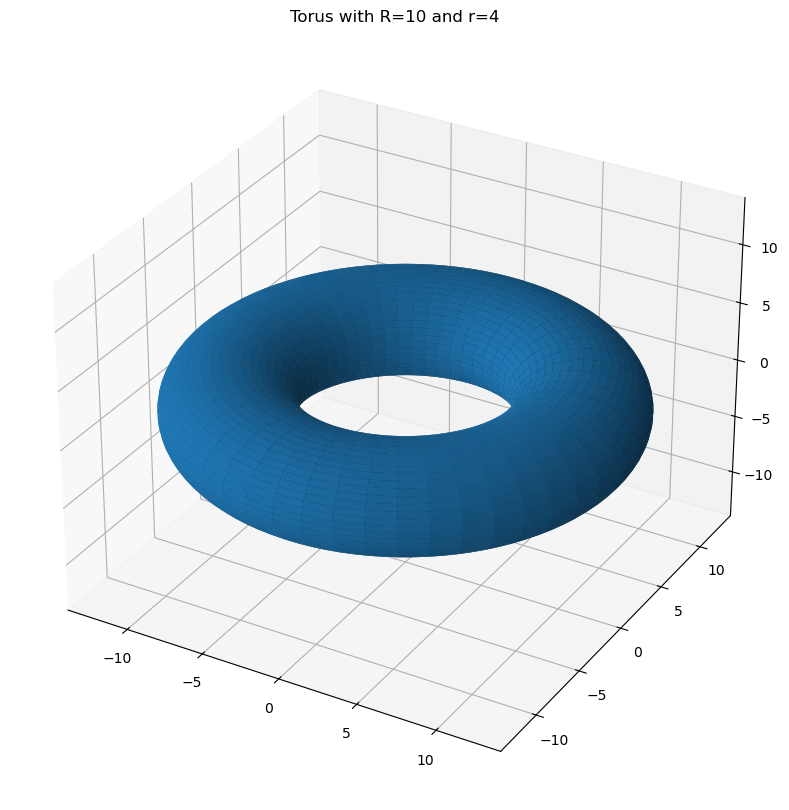

In [232]:
# Define phi and theta
n = 100
theta = np.linspace(0, 2*np.pi, n, endpoint=True)
phi = theta.copy()
theta, phi =np.meshgrid(theta,phi)

 # Compute x, y, z over phi and theta
x = (R + r * np.sin(theta)) * np.cos(phi)
y = (R + r * np.sin(theta)) * np.sin(phi)
z = r * np.cos(theta)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

# Plot surface
ax.plot_surface(x, y, z)

# Set limits
ax.set_xlim(-r-R,r+R) # This one is just to explicit what is already implicit: those are already the default range, since default is to use actual data min and max
ax.set_ylim(-r-R,r+R) # Same remark
ax.set_zlim(-r-R,r+R) # But this one changes things: implicit range would have been [-r,r] without this line

# Add title
plt.title(f'Torus with R={R} and r={r}')

plt.show()

#### **Exercise 7:**

Repeat the curve fitting example (from SciPy lecture) with the following modifications:

 - choose some other function
 - first write the data to a file, then read it (with numpy, for example)
 - produce the picture that has axes, name and legend


In [181]:
from scipy import optimize

In [190]:
# Let's generate fake data that we can "fit" then 
def f(x, a, b):
    return np.exp(-a*x/b)

#random makes it look like experimental data
a, b = 1.3, 2
x = np.linspace(0, 4, 50)
y = f(x, a, b) + .1*np.random.normal(size=50)

# Save the data to file
np.savetxt('fake_data.txt', y)

In [ ]:
# Read data from a file
y = np.loadtxt('fake_data.txt')

[0.20669826 0.2988182 ]


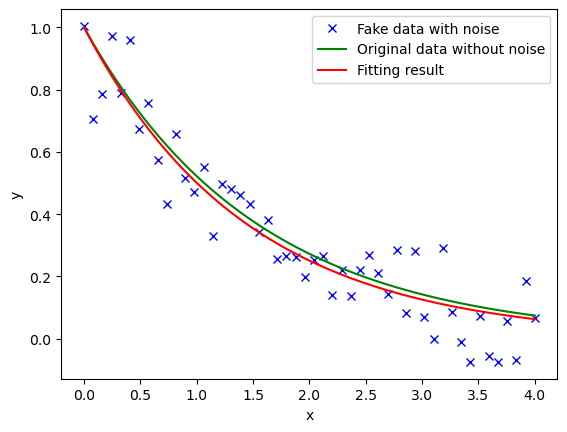

In [198]:
# Now fit the model
params, params_cov = optimize.curve_fit(f, x, y)
print(params)

# plot the data and the fitted curve
plt.plot(x, y, 'bx', label='Fake data with noise')
plt.plot(x,f(x, a, b),'g-', label='Original data without noise')
plt.plot(x, f(x, *params), 'r-', label='Fitting result')
plt.legend()
plt.xlabel('x'); plt.ylabel('y')
plt.show()

#### **Exercise 8:**

Integrate the function `x**2 + 10*np.sin(x)` on the interval `[-10,10]`.
Find a way to make a plot like in textbooks where you color the area under the curve that you integrate.
Now integrate the same function symbolically using `sympy`, then put borders into it and compare the results.

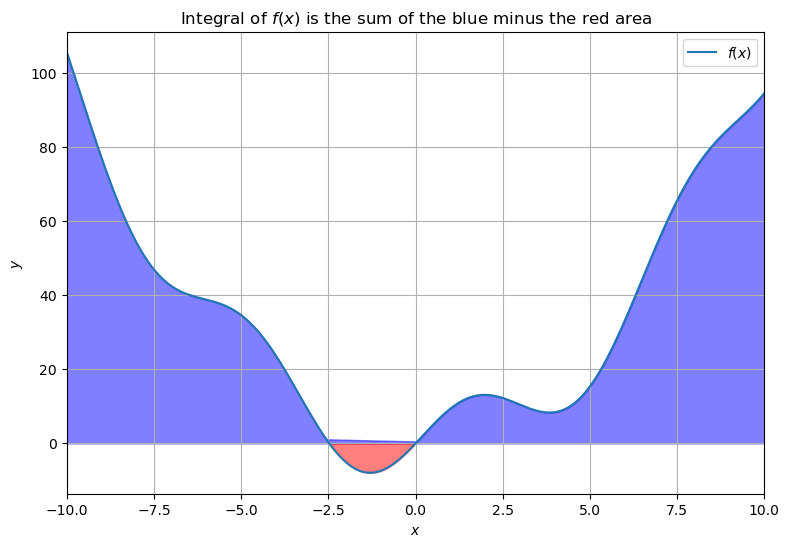

In [177]:
def funct (x):
    return x**2 + 10*np.sin(x)

# Create values for x-axis and y-axis
n = 200                              # number of discretization in x-axis
xlist = np.linspace(-10, 10, n)
xbase_list = np.zeros(n)
ylist = funct(xlist)

# Initialize figure
plt.figure(figsize=(9, 6))

# Plot the function as line
plt.plot(xlist, ylist, label='$f(x)$')

# Shade area under function
idx_positive = (ylist >= 0)
plt.fill_between(xlist[idx_positive], xbase_list[idx_positive], ylist[idx_positive], color='blue', alpha=0.5)
plt.fill_between(xlist[~idx_positive], xbase_list[~idx_positive], ylist[~idx_positive], color='red', alpha=0.5)

# Add decorators
plt.xlabel('$x$'); plt.ylabel('$y$')
plt.title('Integral of $f(x)$ is the sum of the blue minus the red area')
plt.grid()
plt.legend()
plt.xlim(-10, 10)
plt.show()

In [180]:
def integration (x):
    return 1 / 3 * x**3 + 10 * np.cos(x)
integration(10) - integration(-10)

np.float64(666.6666666666666)

In [179]:
# Define symbol
x = sp.symbols('x')

# Define function
funct = x**2 + 10*sp.sin(x)

# Perform integration
sp.integrate(funct, (x, -10, 10)) # double o is infinity

2000/3